In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
duration=200
length=2.5
a=0.015
x_steps_amount=100
t_steps_amount=501
Z=np.zeros((x_steps_amount,t_steps_amount))

start_value=0
start_impulse=1

In [34]:
x_step=length/(x_steps_amount-1)
t_step=duration/(t_steps_amount-1)

In [35]:
Z[:,0]=start_value
Z[0,:]=start_impulse
Z[0][0]=1

In [36]:
Currant=a*t_step/x_step
if Currant >1 :
    print("Change Currant")

In [43]:
for t in range(0,t_steps_amount-1):
    for x in range(1,x_steps_amount-1):
        e=1e-5
        r=(Z[x][t]-Z[x-1][t]+e)/(Z[x+1][t]-Z[x][t]+e)
        #print(r)
        if r>0:
            fi=min(2*r,2)
        else:
            fi=0
        fplus=0.5*fi*Currant*(1-Currant)*(Z[x+1][t]-Z[x][t])
        fminus=0.5*fi*Currant*(1-Currant)*(Z[x][t]-Z[x-1][t])
        Z[x][t+1]=Z[x][t]-Currant*(Z[x][t]-Z[x-1][t])-(fplus-fminus)
        #print("x {} t {} Z {}".format(x,t,Z))

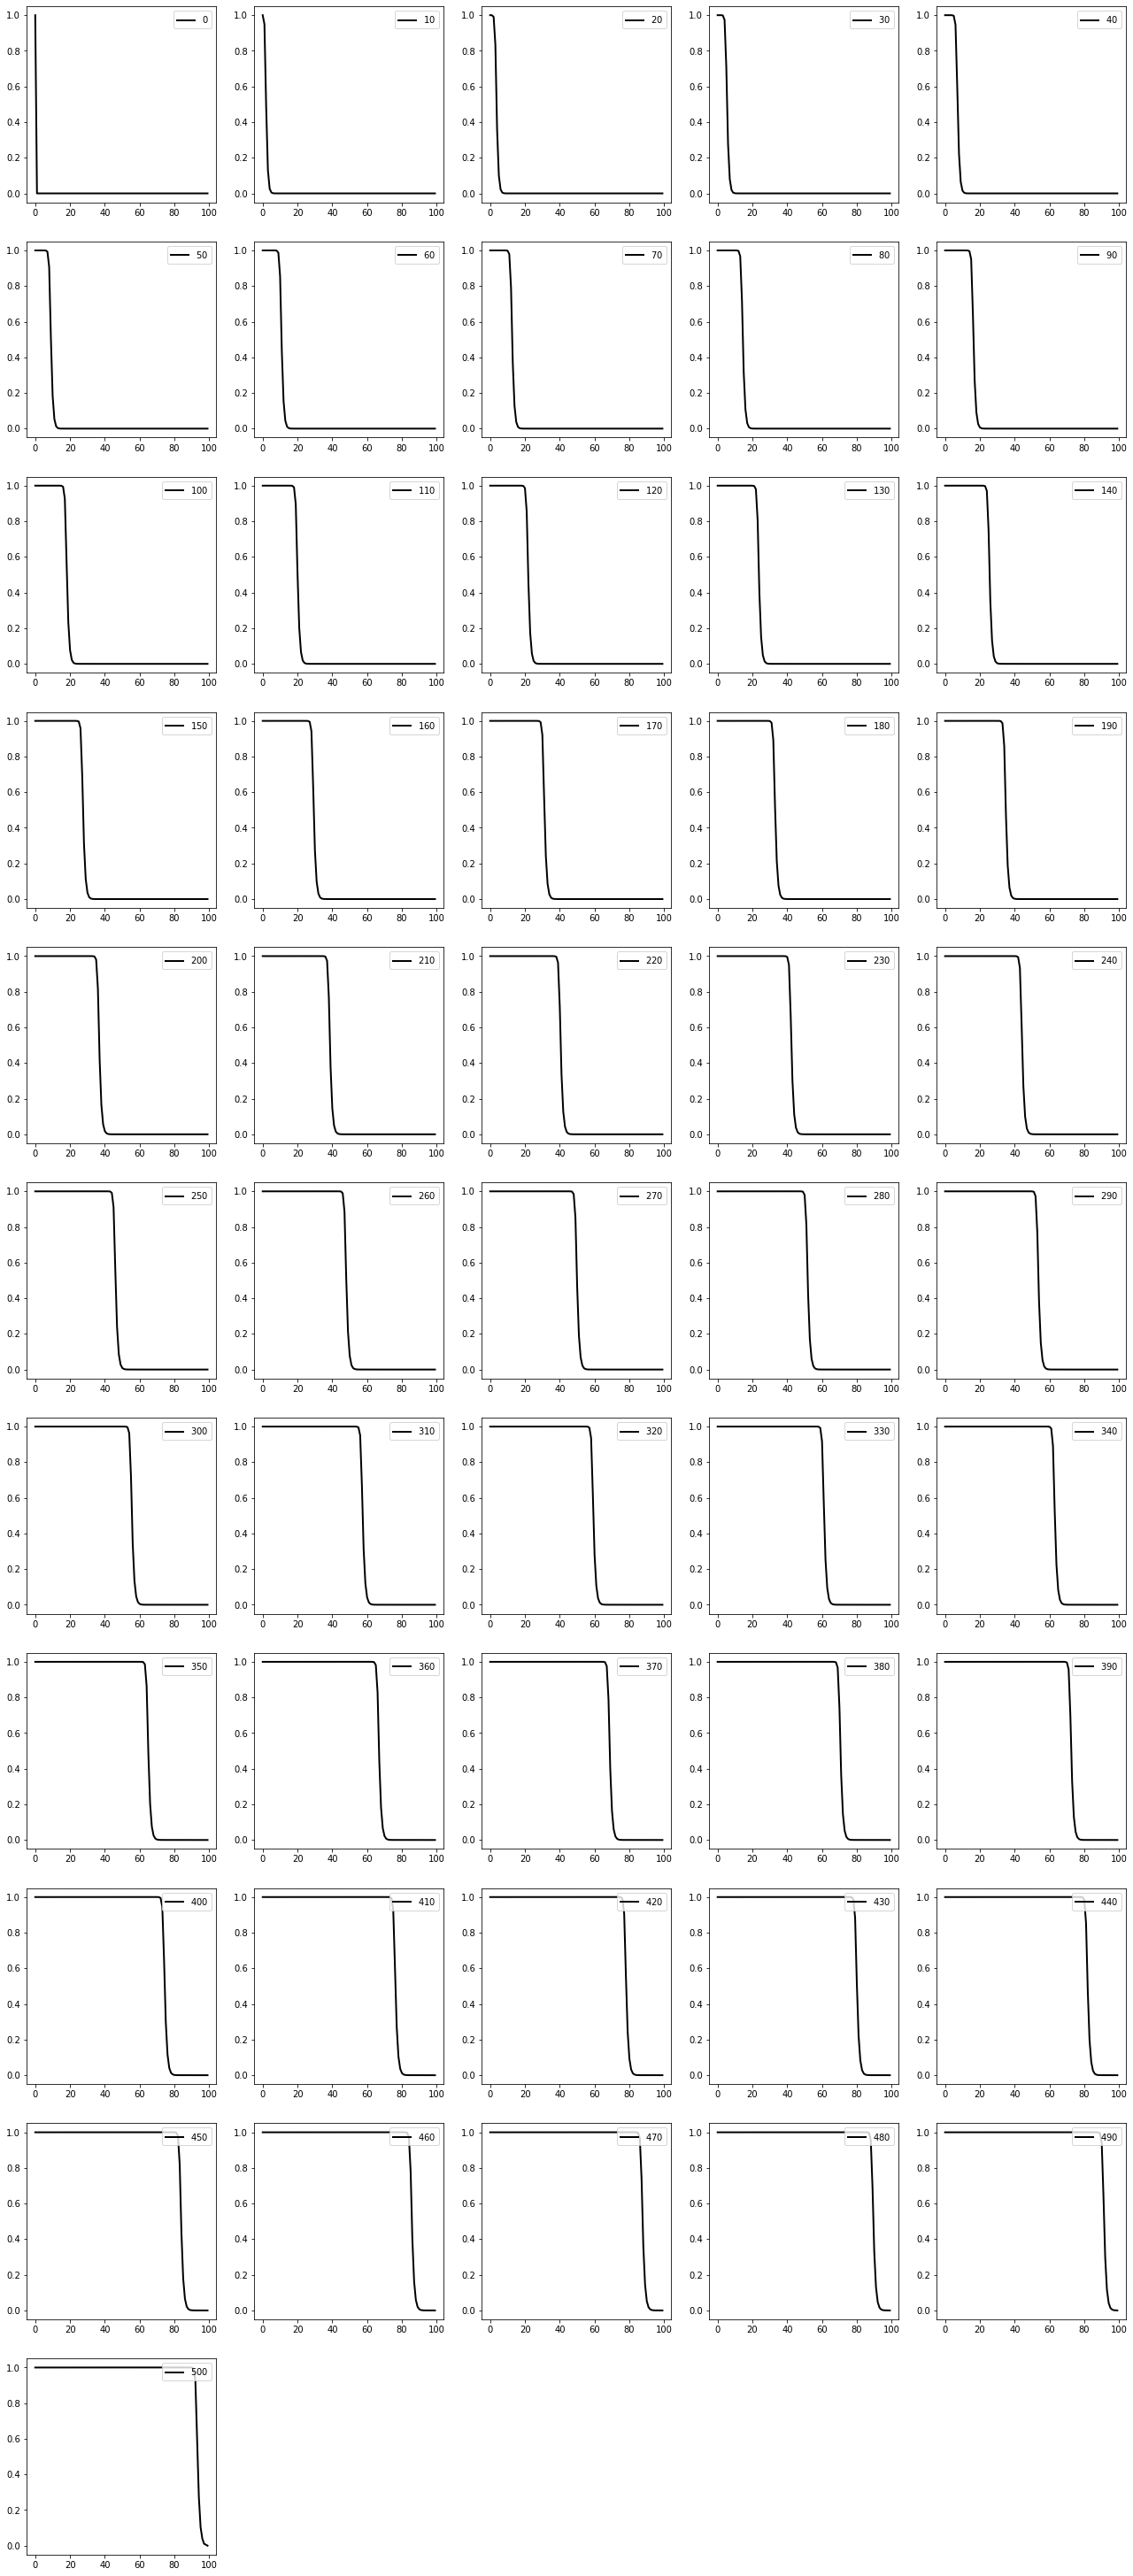

In [44]:
for t in range(0,t_steps_amount,10):
    plt.subplot(11,5,t/10+1)
    plt.plot(Z[:,t],c='black',lw=2, label=f"${t}$")
    plt.legend(loc='upper right')
    plt.subplots_adjust(top=10,bottom=0.001,right=3)